In [1]:
import pandas as pd

# Find ALEdb samples that have 1) oxyR variants and 2) iModulonDB samples

In [2]:
raw_all_aledb_mut_df = pd.read_pickle('../all_aledb_raw_mut_df.pkl')
oxyR_muts = raw_all_aledb_mut_df[raw_all_aledb_mut_df['Gene'] == 'oxyR'].copy().reset_index(drop=True)

# AFI values are best as strings for matching against iModDB md.
oxyR_muts.ale = oxyR_muts.ale.astype(str)
oxyR_muts.flask = oxyR_muts.flask.astype(str)
oxyR_muts.isolate = oxyR_muts.isolate.astype(str)

display(oxyR_muts.head(), set(oxyR_muts.exp))

,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,Gene,Reference Seq,ALEdb source
0,pgiPAE,25,92,1,1,1.0,4159090,SNP,C→T,R201C (CGC→TGC),oxyR,NC_000913_3_pae_pgi,public
1,tpiHSA,10,104,1,1,1.0,4159168,SNP,G→A,A233T (GCA→ACA),oxyR,NC_000913_3_hsa_tpiA,public
2,C321.∆A.earlyfix,1,1,1,1,1.0,4158776,DEL,Δ1 bp,coding (287/918 nt),oxyR,NC_000913,public
3,C321.∆A.earlyfix,1,1,2,1,1.0,4158776,DEL,Δ1 bp,coding (287/918 nt),oxyR,NC_000913,public
4,C321.∆A.earlyfix,10,1,1,1,1.0,4158617,SNP,T→C,L43P (CTG→CCG),oxyR,NC_000913,public


{'42C_Tenaillon-Ara-_LTEE_strain_from_generation_2000-DM25-REL606gbk-stationary-42-Glucose0025-NH4Cl1-KH2PO49-MgSO405-O20',
 'C321.∆A',
 'C321.∆A.earlyfix',
 'Iron-ALE',
 'PutidaTALE_coumaric_cou_Fer_mix',
 'PutidaTALE_glucose',
 'ROS_eAMP',
 'pgiBME',
 'pgiPAE',
 'tpiHSA',
 'tpiPAE',
 'tpiVCH',
 'unpublished_ALE_experiment_0',
 'unpublished_ALE_experiment_118',
 'unpublished_ALE_experiment_121',
 'unpublished_ALE_experiment_130',
 'unpublished_ALE_experiment_136',
 'unpublished_ALE_experiment_137',
 'unpublished_ALE_experiment_14',
 'unpublished_ALE_experiment_141',
 'unpublished_ALE_experiment_171',
 'unpublished_ALE_experiment_178',
 'unpublished_ALE_experiment_186',
 'unpublished_ALE_experiment_20',
 'unpublished_ALE_experiment_207',
 'unpublished_ALE_experiment_208',
 'unpublished_ALE_experiment_209',
 'unpublished_ALE_experiment_21',
 'unpublished_ALE_experiment_218',
 'unpublished_ALE_experiment_238',
 'unpublished_ALE_experiment_24',
 'unpublished_ALE_experiment_244',
 'unpubli

In [3]:
imoddb_ale_md_df = pd.read_pickle('../data/imodulondb/imoddb_ale_md_df.pkl')
imoddb_ale_md_df.head()

,sample,study,project,condition,rep_id,Strain Description,Strain,Culture Type,Evolved Sample,Base Media,...,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,afir,ALE exp,ale,flask,isolate
p1k_00125,glu__glu_ale3__1,Glucose Evolution,glu,glu_ale3,1,Escherichia coli GLU.3.412.1,MG1655,Batch,Endpoint,M9,...,,,,,,3.412.1,GLU,3,412,1
p1k_00126,glu__glu_ale4__1,Glucose Evolution,glu,glu_ale4,1,Escherichia coli GLU.4.403.1,MG1655,Batch,Endpoint,M9,...,,,,,,4.403.1,GLU,4,403,1
p1k_00127,glu__glu_ale5__1,Glucose Evolution,glu,glu_ale5,1,Escherichia coli GLU.5.288.1,MG1655,Batch,Endpoint,M9,...,,,,,,5.288.1,GLU,5,288,1
p1k_00128,glu__glu_ale6__1,Glucose Evolution,glu,glu_ale6,1,Escherichia coli GLU.6.406.1,MG1655,Batch,Endpoint,M9,...,,,,,,6.406.1,GLU,6,406,1
p1k_00129,glu__glu_ale8__1,Glucose Evolution,glu,glu_ale8,1,Escherichia coli GLU.8.380.1,MG1655,Batch,Endpoint,M9,...,,,,,,8.380.1,GLU,8,380,1


In [4]:
oxyR_muts['iModDB samples'] = ''
for imoddb_sample_id, r in imoddb_ale_md_df.iterrows():
    df = pd.DataFrame()
    if r.isolate == '':
        df = oxyR_muts[(oxyR_muts.exp == r['ALE exp']) & (oxyR_muts['ale'] == r.ale) & (oxyR_muts['flask'] == r.flask)]
    else:
        df = oxyR_muts[(oxyR_muts.exp == r['ALE exp']) & (oxyR_muts['ale'] == r.ale) & (oxyR_muts['flask'] == r.flask) & (oxyR_muts['isolate'] == r.isolate)]
    if len(df) > 0:
        for i, r2 in df.iterrows():
            if oxyR_muts.at[i, 'iModDB samples'] == '':
                oxyR_muts.at[i, 'iModDB samples'] = set()
            oxyR_muts.at[i, 'iModDB samples'].add(imoddb_sample_id)
imoddb_oxyR_muts = oxyR_muts[oxyR_muts['iModDB samples'] != ''].copy()
imoddb_oxyR_muts['AA sub'] = imoddb_oxyR_muts.Details.apply(lambda s: s.split(' ')[0])
imoddb_oxyR_muts.to_pickle('./imoddb_oxyR_muts.pkl')
imoddb_oxyR_muts

,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,Details,Gene,Reference Seq,ALEdb source,iModDB samples,AA sub
24,Iron-ALE,17,45,1,1,1.00,4159126,SNP,G→C,A213P (GCG→CCG),oxyR,NC_000913,public,"{p1k_00328, p1k_00325, p1k_00327, p1k_00326}",A213P
25,Iron-ALE,18,39,1,1,1.00,4159112,SNP,G→A,C208Y (TGT→TAT),oxyR,NC_000913,public,"{p1k_00330, p1k_00331, p1k_00332, p1k_00329}",C208Y
26,Iron-ALE,19,39,1,1,1.00,4158809,SNP,C→T,P107L (CCG→CTG),oxyR,NC_000913,public,"{p1k_00333, p1k_00336, p1k_00334, p1k_00335}",P107L
27,Iron-ALE,20,40,1,1,1.00,4158827,SNP,T→A,L113Q (CTG→CAG),oxyR,NC_000913,public,"{p1k_00340, p1k_00337, p1k_00338, p1k_00339}",L113Q
55,ROS_eAMP,13,87,1,1,1.00,4159126,SNP,G→A,A213T (GCG→ACG),oxyR,NC_000913,public,"{p1k_00551, p1k_00550, p1k_00546, p1k_00548, p...",A213T
56,ROS_eAMP,17,104,0,1,1.00,4158785,SNP,C→T,P99L (CCC→CTC),oxyR,NC_000913,public,"{p1k_00571, p1k_00573, p1k_00572, p1k_00575, p...",P99L
57,ROS_eAMP,17,104,1,1,1.00,4158785,SNP,C→T,P99L (CCC→CTC),oxyR,NC_000913,public,"{p1k_00571, p1k_00573, p1k_00572, p1k_00575, p...",P99L
58,ROS_eAMP,21,97,0,1,1.00,4159079,SNP,G→T,G197V (GGT→GTT),oxyR,NC_000913,public,"{p1k_00594, p1k_00595, p1k_00598, p1k_00596, p...",G197V
62,ROS_eAMP,9,77,0,1,0.31,4159068,SNP,G→A,M193I (ATG→ATA),oxyR,NC_000913,public,"{p1k_00535, p1k_00539, p1k_00538, p1k_00537, p...",M193I
112,Iron-ALE,17,45,1,1,1.00,4159126,SNP,G→C,A213P (GCG→CCG),oxyR,NC_000913,public,"{p1k_00328, p1k_00325, p1k_00327, p1k_00326}",A213P


# Annotate specific oxyR mutations to iModulonDB OxyR Imodulon sample activities

In [5]:
from pymodulon.io import *

ica = load_json_model('../data/imods/precise1k_with_ygfZ_muts.json.gz')
all_imoddb_md_df = pd.read_csv('../data/imodulondb/sample_table.csv', index_col=0)
all_imoddb_md_df.head()

,sample,study,project,condition,rep_id,Strain Description,Strain,Culture Type,Evolved Sample,Base Media,...,creator,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_similar_replicates,passed_number_replicates,run_date,n_replicates
p1k_00001,control__wt_glc__1,Control,control,wt_glc,1,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,...,Sangwoo Seo,True,True,True,True,control:wt_glc,True,True,4/17/13,2.0
p1k_00002,control__wt_glc__2,Control,control,wt_glc,2,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,...,Sangwoo Seo,True,True,True,True,control:wt_glc,True,True,4/17/13,2.0
p1k_00003,fur__wt_dpd__1,Fur,fur,wt_dpd,1,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,...,Sangwoo Seo,True,True,True,True,fur:wt_dpd,True,True,10/2/13,2.0
p1k_00004,fur__wt_dpd__2,Fur,fur,wt_dpd,2,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,...,Sangwoo Seo,True,True,True,True,fur:wt_dpd,True,True,10/2/13,2.0
p1k_00005,fur__wt_fe__1,Fur,fur,wt_fe,1,Escherichia coli K-12 MG1655,MG1655,Batch,No,M9,...,Sangwoo Seo,True,True,True,True,fur:wt_fe,True,True,9/5/13,2.0


In [6]:
OxyR_imod_act_df = ica.A.loc[['OxyR']].T
OxyR_imod_act_df['oxyR mutation'] = ''
for _, r in imoddb_oxyR_muts.iterrows():
    for imoddb_sample_id in r['iModDB samples']:
        OxyR_imod_act_df.at[imoddb_sample_id, 'oxyR mutation'] = 'oxyR ' + r['AA sub']
OxyR_imod_act_df['oxyR mutation'] = OxyR_imod_act_df['oxyR mutation'].apply(lambda s: 'none' if s == '' else s)

OxyR_imod_act_df['Strain Description'] = OxyR_imod_act_df.apply(lambda r: all_imoddb_md_df.at[r.name, 'Strain Description'] if r.name in all_imoddb_md_df.index else '',axis=1)
OxyR_imod_act_df['Supplement'] = OxyR_imod_act_df.apply(lambda r: all_imoddb_md_df.at[r.name, 'Supplement'] if r.name in all_imoddb_md_df.index else '',axis=1)
OxyR_imod_act_df['project'] = OxyR_imod_act_df.apply(lambda r: all_imoddb_md_df.at[r.name, 'project'] if r.name in all_imoddb_md_df.index else '',axis=1)
OxyR_imod_act_df.fillna('', inplace=True)

OxyR_imod_act_df['Strain Description'] = OxyR_imod_act_df.apply(lambda r: 'ygfZ mutant' if 'SDT_ygfZ' in r.name else r['Strain Description'], axis=1)
OxyR_imod_act_df['Supplement'] = OxyR_imod_act_df.apply(lambda r: 'H202?' if 'SDT_ygfZ' in r.name else r['Supplement'], axis=1)
OxyR_imod_act_df['project'] = OxyR_imod_act_df.apply(lambda r: 'general ROS tolerance?' if 'SDT_ygfZ' in r.name else r['project'], axis=1)

OxyR_imod_act_df

,OxyR,oxyR mutation,Strain Description,Supplement,project
p1k_00001,0.130714,none,Escherichia coli K-12 MG1655,,control
p1k_00002,-0.130714,none,Escherichia coli K-12 MG1655,,control
p1k_00003,0.232581,none,Escherichia coli K-12 MG1655,DPD (0.2mM),fur
p1k_00004,-0.135165,none,Escherichia coli K-12 MG1655,DPD (0.2mM),fur
p1k_00005,-0.140487,none,Escherichia coli K-12 MG1655,FeCl2 (0.1mM),fur
...,...,...,...,...,...
SDT_ygfZ5,-2.950000,none,ygfZ mutant,H202?,general ROS tolerance?
SDT_ygfZ6,-2.563494,none,ygfZ mutant,H202?,general ROS tolerance?
SDT_ygfZ7,-1.021649,none,ygfZ mutant,H202?,general ROS tolerance?
SDT_ygfZ8,-0.296442,none,ygfZ mutant,H202?,general ROS tolerance?


In [7]:
# Checking with NB combining mutations from all genes
OxyR_imod_act_df[OxyR_imod_act_df['oxyR mutation'] != 'none']

,OxyR,oxyR mutation,Strain Description,Supplement,project
p1k_00325,15.376893,oxyR A213P,Escherichia coli OxyR.17.45,,oxyR
p1k_00326,15.540811,oxyR A213P,Escherichia coli OxyR.17.45,,oxyR
p1k_00327,14.976923,oxyR A213P,Escherichia coli OxyR.17.45,H2O2(2mM),oxyR
p1k_00328,13.950407,oxyR A213P,Escherichia coli OxyR.17.45,H2O2(2mM),oxyR
p1k_00329,11.085332,oxyR C208Y,Escherichia coli OxyR.18.39,,oxyR
p1k_00330,11.123416,oxyR C208Y,Escherichia coli OxyR.18.39,,oxyR
p1k_00331,13.801073,oxyR C208Y,Escherichia coli OxyR.18.39,H2O2(2mM),oxyR
p1k_00332,13.930908,oxyR C208Y,Escherichia coli OxyR.18.39,H2O2(2mM),oxyR
p1k_00333,16.067309,oxyR P107L,Escherichia coli OxyR.19.39,,oxyR
p1k_00334,16.137851,oxyR P107L,Escherichia coli OxyR.19.39,,oxyR


# Get all iModulonDB samples for projects that have oxyR mutations
We want to compare OxyR iModulons activities between samples that have and don't have oxyR mutations.

In [8]:
import re


proj_w_oxyR_vars = set(OxyR_imod_act_df[OxyR_imod_act_df['oxyR mutation'] != 'none'].project)
oxyR_proj_imod_act_df = OxyR_imod_act_df[OxyR_imod_act_df.project.isin(proj_w_oxyR_vars)].copy()
oxyR_proj_imod_act_df['Supplement'] = oxyR_proj_imod_act_df['Supplement'].apply(lambda s: 'none' if s == '' else s)  # Better for plots
# oxyR_proj_imod_act_df

def _update_strain_description(sample_d):
    sd = sample_d['Strain Description']
    sd = sd.replace('Escherichia coli', 'E. coli')
    sd = sd.replace('K-12 MG1655', '')
    sd = sd.replace('OxyR.', 'FeSO4 ALE ')
    sd = sd.replace('ERS.', 'paraquat ALE ')

    # Remove the ALE numbers
    if sample_d['oxyR mutation'] != 'none':
        if 'paraquat ALE' in sd:
            m = re.search(r"\d", sd)
            sd = sd[:m.start()-1]
        if 'FeSO4 ALE' in sd:
            sd = sd[:-6]  # currently hardcoded shortcut

    if sample_d['oxyR mutation'] == 'none':
        if sample_d['project'] == 'oxyR':
            sd = 'WT oxyR E. coli FeSO4 ALE'
        if sample_d['project'] == 'ros_tale':
            sd = 'WT oxyR E. coli paraquat ALE'

    return sd
    

oxyR_proj_imod_act_df['Strain Description'] = oxyR_proj_imod_act_df.apply(lambda r: _update_strain_description(r), axis=1)
# display(oxyR_proj_imod_act_df, set(oxyR_proj_imod_act_df['Strain Description']))

oxyR_proj_imod_act_df['strain'] = oxyR_proj_imod_act_df.apply(
    lambda r: r['oxyR mutation'] + ' ' + r['Strain Description'] if r['oxyR mutation'] != 'none' else r['Strain Description'],
    axis=1
    )
display(set(oxyR_proj_imod_act_df.strain))

{'WT oxyR E. coli FeSO4 ALE',
 'WT oxyR E. coli paraquat ALE',
 'oxyR A213P E. coli FeSO4 ALE',
 'oxyR A213T E. coli paraquat ALE',
 'oxyR C208Y E. coli FeSO4 ALE',
 'oxyR G197V E. coli paraquat ALE',
 'oxyR L113Q E. coli FeSO4 ALE',
 'oxyR M193I E. coli paraquat ALE',
 'oxyR P107L E. coli FeSO4 ALE',
 'oxyR P99L E. coli paraquat ALE'}

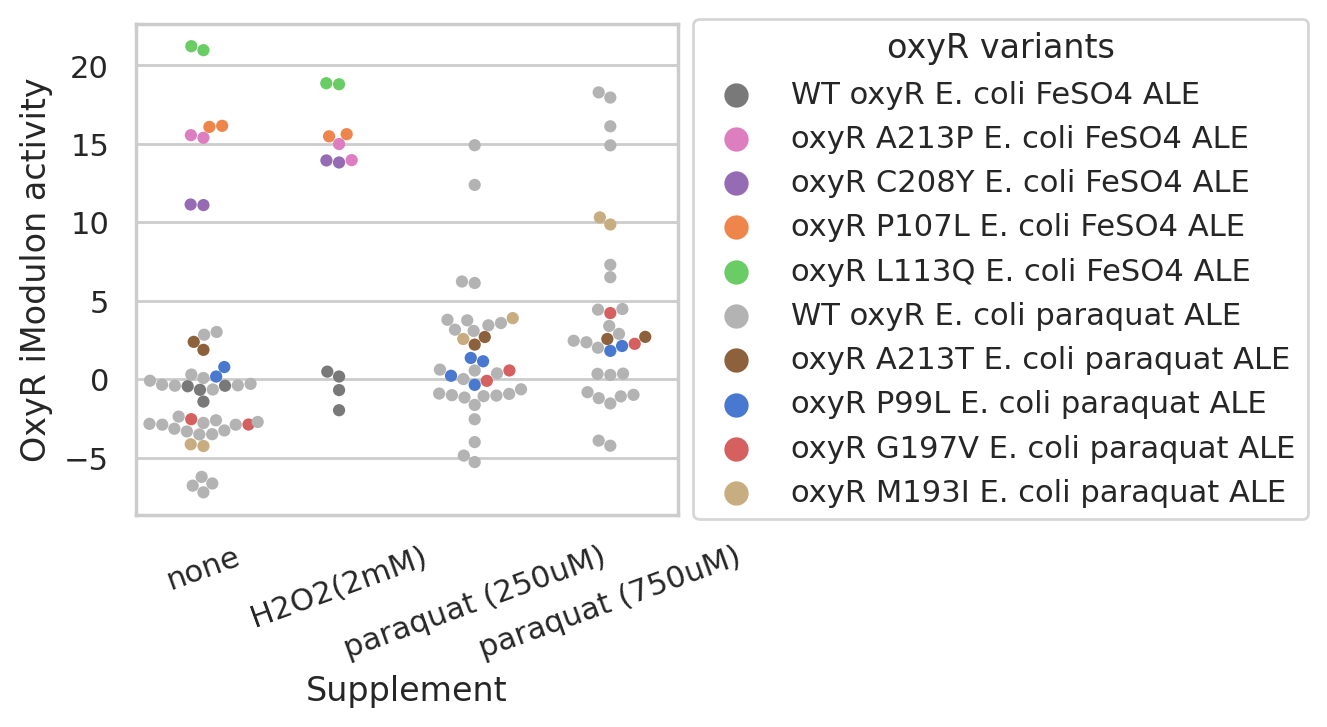

In [9]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(
    style="whitegrid",
    # palette="muted"
)

# Width of 4 is best for keeping dots from substantial overlap
figure(figsize=(3.5, 3.25), dpi=200)

strain_clr_d = {
    'WT oxyR E. coli FeSO4 ALE': '#797979',
    'WT oxyR E. coli paraquat ALE': '#B3B3B3',
    'oxyR A213P E. coli FeSO4 ALE': '#DC7EC0',
    'oxyR A213T E. coli paraquat ALE': "#8C613C",
    'oxyR C208Y E. coli FeSO4 ALE': '#956CB4',
    'oxyR G197V E. coli paraquat ALE': '#D65F5F',
    'oxyR L113Q E. coli FeSO4 ALE': '#6ACC64',
    'oxyR P107L E. coli FeSO4 ALE': '#EE854A',
    'oxyR P99L E. coli paraquat ALE': '#4878D0',
    'oxyR M193I E. coli paraquat ALE': '#C7AD7F',
}

# point size has to be less than 5, otherwise seaborn says that not all points can be placed.
ax = sns.swarmplot(data=oxyR_proj_imod_act_df, x='Supplement', y="OxyR", hue='strain', palette=strain_clr_d, size=4.4)
ax.set(ylabel="OxyR iModulon activity")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='oxyR variants')
plt.xticks(rotation=20)
plt.savefig("f3c.svg")

In [10]:
oxyR_proj_imod_act_df_flat_wt = oxyR_proj_imod_act_df.copy()
oxyR_proj_imod_act_df_flat_wt['Strain Description'] = oxyR_proj_imod_act_df_flat_wt['Strain Description'].apply(lambda s: "WT oxyR" if "WT oxyR" in s else s)
oxyR_proj_imod_act_df_flat_wt

,OxyR,oxyR mutation,Strain Description,Supplement,project,strain
p1k_00317,-0.426755,none,WT oxyR,none,oxyR,WT oxyR E. coli FeSO4 ALE
p1k_00318,-0.459119,none,WT oxyR,none,oxyR,WT oxyR E. coli FeSO4 ALE
p1k_00319,-0.703438,none,WT oxyR,H2O2(2mM),oxyR,WT oxyR E. coli FeSO4 ALE
p1k_00320,0.161745,none,WT oxyR,H2O2(2mM),oxyR,WT oxyR E. coli FeSO4 ALE
p1k_00321,-0.685671,none,WT oxyR,none,oxyR,WT oxyR E. coli FeSO4 ALE
...,...,...,...,...,...,...
p1k_00535,-4.267846,oxyR M193I,E. coli paraquat ALE,none,ros_tale,oxyR M193I E. coli paraquat ALE
p1k_00536,3.882215,oxyR M193I,E. coli paraquat ALE,paraquat (250uM),ros_tale,oxyR M193I E. coli paraquat ALE
p1k_00537,2.551971,oxyR M193I,E. coli paraquat ALE,paraquat (250uM),ros_tale,oxyR M193I E. coli paraquat ALE
p1k_00538,9.849496,oxyR M193I,E. coli paraquat ALE,paraquat (750uM),ros_tale,oxyR M193I E. coli paraquat ALE


In [11]:
oxyR_proj_imod_act_df_flat_wt['strain'] = oxyR_proj_imod_act_df_flat_wt['strain'].apply(lambda s: s.replace('oxyR ', ''))
oxyR_proj_imod_act_df_flat_wt['strain'] = oxyR_proj_imod_act_df_flat_wt['strain'].apply(lambda s: s.replace('E. coli ', '('))
oxyR_proj_imod_act_df_flat_wt['strain'] = oxyR_proj_imod_act_df_flat_wt['strain'].apply(lambda s: s+')')
display(oxyR_proj_imod_act_df_flat_wt['strain'].unique())

array(['WT (FeSO4 ALE)', 'A213P (FeSO4 ALE)', 'C208Y (FeSO4 ALE)',
       'P107L (FeSO4 ALE)', 'L113Q (FeSO4 ALE)', 'WT (paraquat ALE)',
       'A213T (paraquat ALE)', 'P99L (paraquat ALE)',
       'G197V (paraquat ALE)', 'M193I (paraquat ALE)'], dtype=object)

In [12]:
none_cat_str = "none (control,\n" + str(len(oxyR_proj_imod_act_df_flat_wt[oxyR_proj_imod_act_df_flat_wt['Supplement']=="none"])) + ' samples)'
oxyR_proj_imod_act_df_flat_wt['Supplement'] = oxyR_proj_imod_act_df_flat_wt['Supplement'].apply(lambda s: none_cat_str if s == "none" else s)

h2o2_2mM_cat_str = "2mM H2O2\n(" + str(len(oxyR_proj_imod_act_df_flat_wt[oxyR_proj_imod_act_df_flat_wt['Supplement']=="H2O2(2mM)"])) + ' samples)'
oxyR_proj_imod_act_df_flat_wt['Supplement'] = oxyR_proj_imod_act_df_flat_wt['Supplement'].apply(lambda s: h2o2_2mM_cat_str if s == "H2O2(2mM)" else s)

paraquat_250uM_cat_str = "250uM paraquat\n(" + str(len(oxyR_proj_imod_act_df_flat_wt[oxyR_proj_imod_act_df_flat_wt['Supplement']=="paraquat (250uM)"])) + ' samples)'
oxyR_proj_imod_act_df_flat_wt['Supplement'] = oxyR_proj_imod_act_df_flat_wt['Supplement'].apply(lambda s: paraquat_250uM_cat_str if s == "paraquat (250uM)" else s)

paraquat_750uM_cat_str = "750uM paraquat\n(" + str(len(oxyR_proj_imod_act_df_flat_wt[oxyR_proj_imod_act_df_flat_wt['Supplement']=="paraquat (750uM)"])) + ' samples)'
oxyR_proj_imod_act_df_flat_wt['Supplement'] = oxyR_proj_imod_act_df_flat_wt['Supplement'].apply(lambda s: paraquat_750uM_cat_str if s == "paraquat (750uM)" else s)

oxyR_proj_imod_act_df_flat_wt.Supplement.unique()

array(['none (control,\n46 samples)', '2mM H2O2\n(12 samples)',
       '250uM paraquat\n(36 samples)', '750uM paraquat\n(31 samples)'],
      dtype=object)

In [13]:
samples_to_drop = oxyR_proj_imod_act_df_flat_wt.index.tolist()

# Removing all samples in other categories
other_sample_imod_act_df = ica.A.loc[['OxyR']].T
other_sample_imod_act_df.drop(samples_to_drop, inplace=True)
assert(len(set(samples_to_drop) & set(other_sample_imod_act_df.index.tolist())) == 0)
all_others_cat_name = 'all other iModulon\nsamples (' + str(len(other_sample_imod_act_df)) + ')'
other_sample_imod_act_df["Supplement"] = all_others_cat_name
other_sample_imod_act_df.head()

,OxyR,Supplement
p1k_00001,0.130714,all other iModulon\nsamples (922)
p1k_00002,-0.130714,all other iModulon\nsamples (922)
p1k_00003,0.232581,all other iModulon\nsamples (922)
p1k_00004,-0.135165,all other iModulon\nsamples (922)
p1k_00005,-0.140487,all other iModulon\nsamples (922)


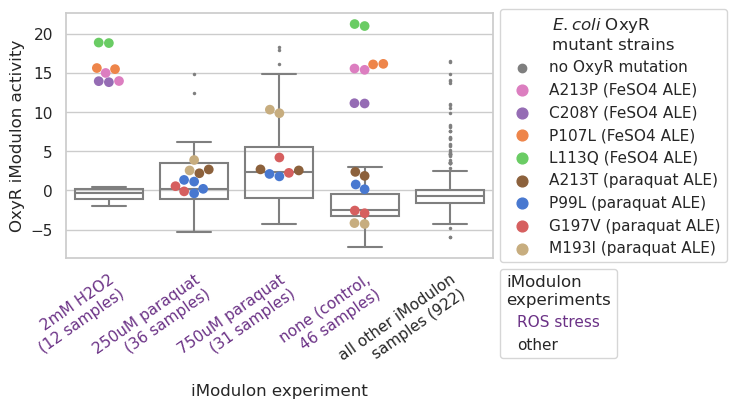

In [14]:
strain_clr_d = {
    'A213P (FeSO4 ALE)': '#DC7EC0',
    'A213T (paraquat ALE)': "#8C613C",
    'C208Y (FeSO4 ALE)': '#956CB4',
    'G197V (paraquat ALE)': '#D65F5F',
    'L113Q (FeSO4 ALE)': '#6ACC64',
    'P107L (FeSO4 ALE)': '#EE854A',
    'P99L (paraquat ALE)': '#4878D0',
    'M193I (paraquat ALE)': '#C7AD7F',
}

order_l = [h2o2_2mM_cat_str, paraquat_250uM_cat_str, paraquat_750uM_cat_str, none_cat_str, all_others_cat_name]

ros_stress_exp_labels = order_l.copy()
ros_stress_exp_labels.remove(all_others_cat_name)

plt.figure(figsize=(5.5, 3.25), dpi=100)

df = oxyR_proj_imod_act_df_flat_wt[oxyR_proj_imod_act_df_flat_wt['oxyR mutation'] == 'none'].copy()
df = pd.concat([df, other_sample_imod_act_df])
ax = sns.boxplot(
    data=df,
    x="Supplement",
    y="OxyR",
    color='lightgrey',
    boxprops={'facecolor': 'None'},
    zorder=1,
    order=order_l,
    flierprops=dict(marker='.', markeredgecolor='none',
                    markerfacecolor='#7F7F7F'),
)

# Create a dummy plot for the additional legend entry
plt.scatter([], [], color='#7F7F7F', label="no OxyR mutation")

df = oxyR_proj_imod_act_df_flat_wt[oxyR_proj_imod_act_df_flat_wt['oxyR mutation'] != 'none'].copy()
sns.swarmplot(
    ax=ax,
    data=df,
    x="Supplement", y="OxyR", hue='strain',
    zorder=2, size=7,
    palette=strain_clr_d,
    order=order_l,
)


original_legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='$\it{E. coli}$ OxyR\nmutant strains')

# Add dummy scatter plots for new legend entries with no markers
dummy_ros_stress = plt.scatter([], [], label="ROS stress", marker='None', color='purple')
dummy_other = plt.scatter([], [], label="other", marker='None')

# Create the second legend for "ROS stress" and "other"
legend2 = plt.legend(
    handles=[dummy_ros_stress, dummy_other],
    loc='center left',
    bbox_to_anchor=(1, -0.225),
    title='iModulon\nexperiments',
    handlelength=0,
    handletextpad=0,
    )

for text in legend2.get_texts():
    if text.get_text() == "ROS stress":
        text.set_color("#6B3286")

# Re-add the original legend to the plot
ax.add_artist(original_legend)

labels = plt.gca().get_xticklabels()
for label in labels:
    if label.get_text() in ros_stress_exp_labels:
        label.set_color('#6B3286')

plt.xticks(rotation=35, ha='right', rotation_mode="anchor")
ax.set(ylabel="OxyR iModulon activity")
ax.set(xlabel="iModulon experiment")
plt.savefig("f3c.svg")
